# Unsupervised Machine Learning 

In [61]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [62]:
# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

In [63]:
data_encoder = pd.read_csv(r"C:\Users\Lenovo\Documents\INDE DATA\caste_durable_encode.csv")
#We make a copy of the file and work on it
data_encoder = data_encoder.copy()
data_encoder.head()

,Primary key - unique identifier for a household,Sector,State,Household size,Household type,Religion,Cast&class,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.),Audio-video__365days,...,car__365days,electrical and lighting__365days,home furnishing__365days,household work equipment__365days,jewellery and ornaments__365days,kitchen equipment__365days,kitchen utensils__365days,motorcycle__365days,productive equipment__365days,sports and medical equipment__365days
0,744471301,0,14,6,3,4,3,0,9000.0,0.0,...,0.0,0.0,250.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0
1,744471302,0,14,5,3,4,3,0,10000.0,0.0,...,0.0,0.0,2000.0,0.0,0.0,0.0,2200.0,0.0,0.0,0.0
2,744471303,0,14,6,3,7,1,1,100000.0,0.0,...,0.0,0.0,300.0,0.0,0.0,0.0,850.0,0.0,0.0,0.0
3,744472301,0,14,8,2,4,2,0,4000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,744472302,0,14,9,3,4,2,0,7500.0,0.0,...,0.0,0.0,700.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0


In [64]:
data_encoder = pd.read_csv(r"C:\Users\Lenovo\Documents\INDE DATA\caste_durable_encode.csv")
#We make a copy of the file and work on it
data_encoder = data_encoder.copy()
data_encoder.head()
data_encoder.drop(columns=['Primary key - unique identifier for a household'], inplace=True)
X=data_encoder

## Modeling

In [59]:
#Fulltable: data_encoder
data_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67187 entries, 0 to 67186
Data columns (total 22 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Sector                                             67187 non-null  int64  
 1   State                                              67187 non-null  int64  
 2   Household size                                     67187 non-null  int64  
 3   Household type                                     67187 non-null  int64  
 4   Religion                                           67187 non-null  int64  
 5   Cast&class                                         67187 non-null  int64  
 6   Whether acquired any major durable goods           67187 non-null  int64  
 7   Household usual monthly consumer expenditure(Rs.)  67187 non-null  float64
 8   Audio-video__365days                               67187 non-null  float64
 9   IT and

In [60]:
#Durable and one social colum ( caste) 
X1=data_encoder.drop(columns=['Sector', 'State', 'Household size', 'Household type', 'Religion', 'Whether acquired any major durable goods'])
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67187 entries, 0 to 67186
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Cast&class                                         67187 non-null  int64  
 1   Household usual monthly consumer expenditure(Rs.)  67187 non-null  float64
 2   Audio-video__365days                               67187 non-null  float64
 3   IT and communication__365days                      67187 non-null  float64
 4   Personal_objects__365days                          67187 non-null  float64
 5   bicycle__365days                                   67187 non-null  float64
 6   car__365days                                       67187 non-null  float64
 7   electrical and lighting__365days                   67187 non-null  float64
 8   home furnishing__365days                           67187 non-null  float64
 9   househ

In [67]:
#Only: durable
X2=X1.drop(columns=['Cast&class'])

## PCA

In [105]:
#TOUTE LES COLLONES SONT ENCODEES (il y a des 0 et des 1, 2..)  dans chaque colunen - Y compris les religious, state, cast
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X2)
df_pca = pca.transform(X2)
df_pca.shape



(67187, 3)

In [104]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,4)]) #on choisit 5 PCA
df_pca

,PC1,PC2,PC3
0,-6784.499187,-3921.457933,3013.765733
1,-6758.161621,-3721.407674,2992.541119
2,-4723.498957,6407.170934,-1402.303705
3,-6898.308355,-4503.055482,3251.960039
4,-6817.657200,-4075.016423,3091.168808
...,...,...,...
67182,243477.550858,-6584.061284,1059.045984
67183,-6696.808981,-3131.844120,3046.696075
67184,-6785.655500,-3045.319816,3392.794493
67185,-6534.010186,-2663.236559,2490.439347


### Clustering with KMeans

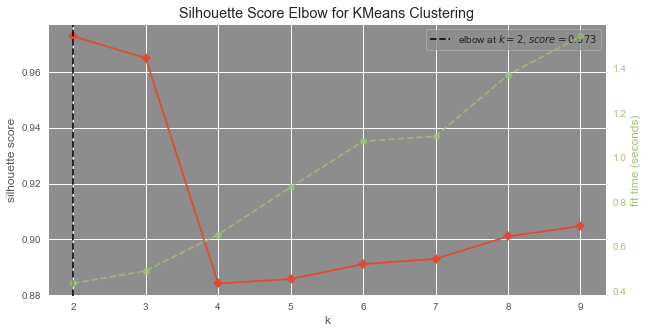

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [70]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca)
visualizer.poof()


##### Elbow indicates an optimal number of clusters of 4 with a silhouette score of 0.73.

In [77]:
model = KMeans(4) #4 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [78]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3]), array([61840,   541,   184,  4622], dtype=int64))

In [93]:
k_centers = model.cluster_centers_

In [94]:
data_encoder['cluster'] = model.labels_  #c'est y-pred ( la longue colonne)

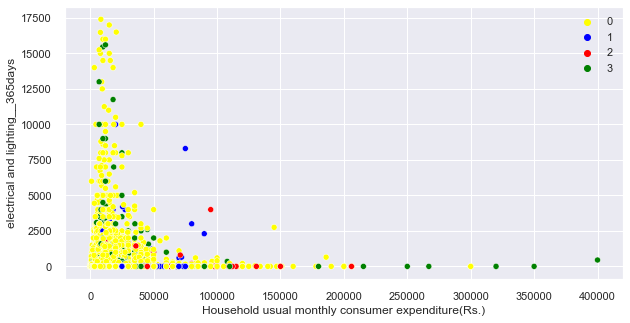

In [99]:

fig, ax = plt.subplots()
sns.scatterplot(data=data_encoder, x='Household usual monthly consumer expenditure(Rs.)', y='electrical and lighting__365days', hue=y_pred, palette=['yellow', 'blue', 'red', 'green'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
#plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()

In [81]:
data_encoder.head()

,Sector,State,Household size,Household type,Religion,Cast&class,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.),Audio-video__365days,IT and communication__365days,...,electrical and lighting__365days,home furnishing__365days,household work equipment__365days,jewellery and ornaments__365days,kitchen equipment__365days,kitchen utensils__365days,motorcycle__365days,productive equipment__365days,sports and medical equipment__365days,cluster
0,0,14,6,3,4,3,0,9000.0,0.0,0.0,...,0.0,250.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0
1,0,14,5,3,4,3,0,10000.0,0.0,0.0,...,0.0,2000.0,0.0,0.0,0.0,2200.0,0.0,0.0,0.0,0
2,0,14,6,3,7,1,1,100000.0,0.0,100.0,...,0.0,300.0,0.0,0.0,0.0,850.0,0.0,0.0,0.0,0
3,0,14,8,2,4,2,0,4000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,14,9,3,4,2,0,7500.0,0.0,0.0,...,0.0,700.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0


In [82]:
# LES LABELS DANS LA TABLE NON ENCODEE
data = pd.read_csv(r'C:\Users\Lenovo\Documents\INDE DATA\caste_durable.csv')

In [87]:
data['cluster'] = model.labels_

<AxesSubplot:xlabel='cluster', ylabel='Religion'>

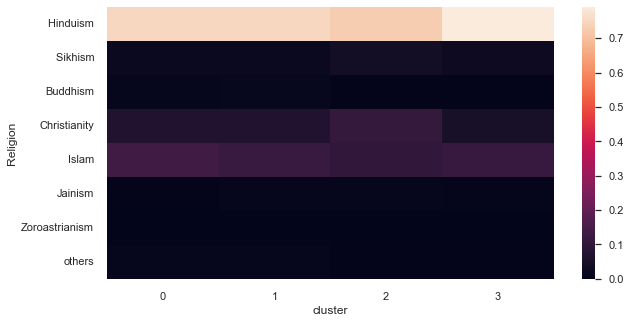

In [88]:
import seaborn as sns
sns.set()
sns.heatmap(pd.crosstab(data.Religion, data.cluster, normalize='columns'))

In [90]:
data


,Primary key - unique identifier for a household,Sector,State,Household size,Household type,Religion,Cast&class,Whether acquired any major durable goods,Household usual monthly consumer expenditure(Rs.),Audio-video__365days,...,electrical and lighting__365days,home furnishing__365days,household work equipment__365days,jewellery and ornaments__365days,kitchen equipment__365days,kitchen utensils__365days,motorcycle__365days,productive equipment__365days,sports and medical equipment__365days,cluster
0,744471301,Rural,JAMMU & KASHMIR,6,Self_non-agriculture,Islam,others,no,9000.0,0.0,...,0.0,250.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0
1,744471302,Rural,JAMMU & KASHMIR,5,Self_non-agriculture,Islam,others,no,10000.0,0.0,...,0.0,2000.0,0.0,0.0,0.0,2200.0,0.0,0.0,0.0,0
2,744471303,Rural,JAMMU & KASHMIR,6,Self_non-agriculture,others,Scheduled Castes,yes,100000.0,0.0,...,0.0,300.0,0.0,0.0,0.0,850.0,0.0,0.0,0.0,0
3,744472301,Rural,JAMMU & KASHMIR,8,Self_agriculture,Islam,Scheduled Tribes,no,4000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,744472302,Rural,JAMMU & KASHMIR,9,Self_non-agriculture,Islam,Scheduled Tribes,no,7500.0,0.0,...,0.0,700.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67182,924591102,Urban,A & N ISLANDS,5,Self_non-agriculture,Hinduism,others,yes,25000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
67183,924591201,Urban,A & N ISLANDS,4,Self_non-agriculture,Christianity,others,yes,10000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
67184,924591202,Urban,A & N ISLANDS,4,Self_non-agriculture,Hinduism,others,yes,8000.0,0.0,...,0.0,0.0,550.0,1000.0,0.0,0.0,0.0,0.0,0.0,0
67185,924591301,Urban,A & N ISLANDS,5,Self_non-agriculture,Christianity,others,no,20000.0,1500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [92]:
data.groupby(['cluster']).mean()

,Primary key - unique identifier for a household,Household size,Household usual monthly consumer expenditure(Rs.),Audio-video__365days,IT and communication__365days,Personal_objects__365days,bicycle__365days,car__365days,electrical and lighting__365days,home furnishing__365days,household work equipment__365days,jewellery and ornaments__365days,kitchen equipment__365days,kitchen utensils__365days,motorcycle__365days,productive equipment__365days,sports and medical equipment__365days
cluster,,,,,,,,,,,,,,,,,
0,8.392558e+08,4.762904,9827.360834,1199.417513,1803.760527,161.018095,201.979334,450.621539,71.064780,920.656032,278.253169,1980.385802,426.612613,395.498043,251.179981,78.525986,26.357422
1,8.595422e+08,5.146026,20269.532348,1151.062847,3386.948244,291.127542,71.719039,452728.369686,151.162662,1903.632163,600.360444,9906.341959,675.099815,597.523105,3187.060998,45.314233,103.438078
2,8.828366e+08,5.228261,31558.755435,3195.108696,6780.271739,341.847826,36.956522,957859.510870,94.184783,3021.298913,614.402174,17494.483696,806.788043,635.434783,4310.326087,2.717391,208.967391
3,8.412649e+08,5.235829,13463.918217,909.168109,2160.502380,272.033968,56.752488,357.421030,86.634574,1123.006491,358.445262,9938.783643,487.059065,473.515145,54868.670922,69.858286,38.592817
